  # Objective
    Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results. This feature will help bring more attention to newer apps that have potential.

    The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights with supporting data/visualizations.

# Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

import seaborn as seb
import statistics 

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('F:\Data Science\#05 Python\google_play_store_app_rating-main\google_play_store_app_rating-main/playstore-analysis(2).csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
#sEVERAL MISSING VALUES AT "Rating"

In [5]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# TASKS

# 1.Data Clean up– Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [6]:
print(f"Missing Values :\n{data.isnull().sum()}") #Finding the null values

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [7]:
data1=data.dropna(subset=['Rating'])

In [8]:
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


# b. Check the null values for the Android Ver column.

In [9]:
print(f"Missing Values in Android Ver:\n{data1['Android Ver'].isnull().sum()}")

Missing Values in Android Ver:
3


In [10]:
print (data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews         Size    Installs  Type     Price Content Rating  \
15         55   2700.00000      5,000+  Free         0       Everyone   
1553    20145     11.00000  1,000,000+  Free         0       Everyone   
4453      230  11000.00000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.00000     10,000+  Free         0       Everyone   
6322     4

 i. Are all 3 records having the same problem?
   
   YES


ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:

data2 = data1.drop(10472)
# Verification for double checking
corrected = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (corrected)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [12]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


iii. Replace remaining missing values with the mode.

In [13]:
import statistics
Android_list = data2['Android Ver'].to_list()
print(Android_list)

['4.0.3 and up', '4.0.3 and up', '4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up', '4.0.3 and up', '4.2 and up', '3.0 and up', '4.0.3 and up', '4.1 and up', '4.0 and up', '4.1 and up', '4.4 and up', '2.3 and up', '4.2 and up', '4.1 and up', '2.3 and up', '4.0.3 and up', '4.1 and up', '4.1 and up', '4.0.3 and up', '4.0.3 and up', '4.1 and up', '3.0 and up', '4.0.3 and up', '4.0.3 and up', '2.3 and up', '2.3 and up', '4.0.3 and up', '2.3 and up', '4.0 and up', '4.1 and up', '4.1 and up', '4.1 and up', '4.4 and up', '2.3.3 and up', '4.0.3 and up', '4.0 and up', '4.0.3 and up', '4.0.3 and up', 'Varies with device', '4.1 and up', '4.1 and up', '4.1 and up', '4.1 and up', '4.1 and up', '2.3 and up', '4.0.3 and up', '4.1 and up', '4.1 and up', 'Varies with device', '4.1 and up', '4.1 and up', '4.0 and up', '4.4 and up', '4.1 and up', '2.2 and up', '4.4 and up', '4.0.3 and up', '4.2 and up', '4.1 and up', '4.0 and up', '4.2 and up', '4.4 and up', '2.3 and up', 'Varies with device', 'Va

In [14]:
data2_new = data2.fillna(statistics.mode(Android_list))
data2_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
print(data2_new.loc[[4453]])

print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4  4.1 and up  
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490  4.1 and up  


Now Android Ver is 4.1 and up for Category 'PERSONALIZATION'

c. Current ver – replace with most common value

In [16]:
print(f"Missing Values :{data2_new['Current Ver'].isnull().sum()}") # Rechecking

Missing Values :0


No missing value is observed

# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [17]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


#Reviews, Size, Last Updated eed to be brought to numeric types

In [18]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

In [19]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   object        
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 1.2+ MB


b. Price variable – remove $ sign and convert to float

In [20]:
data2_new['Price'] = data2_new['Price'].str.replace('$','')

In [21]:
data2_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [22]:
data2_new['Price'] = data2_new['Price'].astype(float)

In [23]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


Here we converted various colmn attributes in as following data type :

column_2   Rating          9366 non-null   float64       
column_3   Reviews         9366 non-null   int32         
column_4   Size            9366 non-null   int32               
column_7   Price           9366 non-null   float64             
column_10  Last Updated    9366 non-null   datetime64[ns]

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [24]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','').str.replace(',', '')

In [25]:
data2_new['Installs'] = data2_new['Installs'].astype(int)

In [26]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [27]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


Successfully removed "+" and "," sign from colmn Installs and changed datatype to int as per requirement

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

In [28]:
pd.unique(data2_new[['Rating']].values.ravel()) #.ravel()-->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Here,
Yes all Avg. rating values is in between 1 and 5

    i. Are there any such records? Drop if so.

b. Reviews should not be more than installs as only those who installed can review the
app.

In [29]:
df = pd.DataFrame()
df = data2_new[data2_new.Reviews <= data2_new.Installs]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [30]:
df.shape

(9359, 13)

# 4. Identify and handle outliers –

### a. Price column

i. Make suitable plot to identify outliers in price

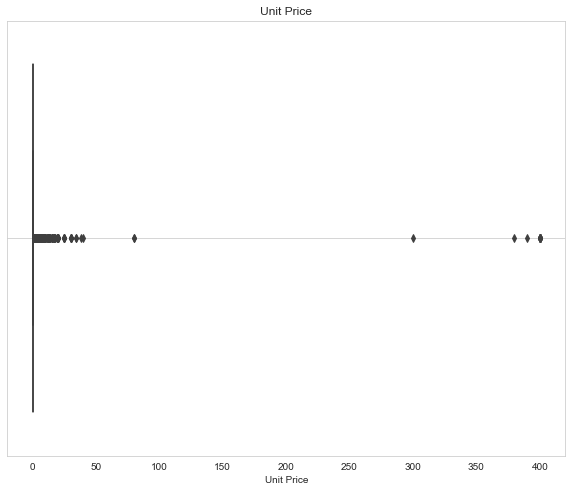

In [31]:

plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)       #Use Box Plot
                    
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

As using above boxplot we can observe the outliers in price colmn.

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [32]:
rslt_df = data2_new[data2_new['Price'] == 200]
print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


in original dataframe there is a row of app $200 but it had rating colmn as blank so when priviously we drop data whose Rating value is null, this data frame gets removed.
Hence in new data frame we got Empty DataFrame

iii. After dropping the useless records, make the suitable plot again to identify
outliers
--> To fullfill above contion let's remove whose price value is 0.

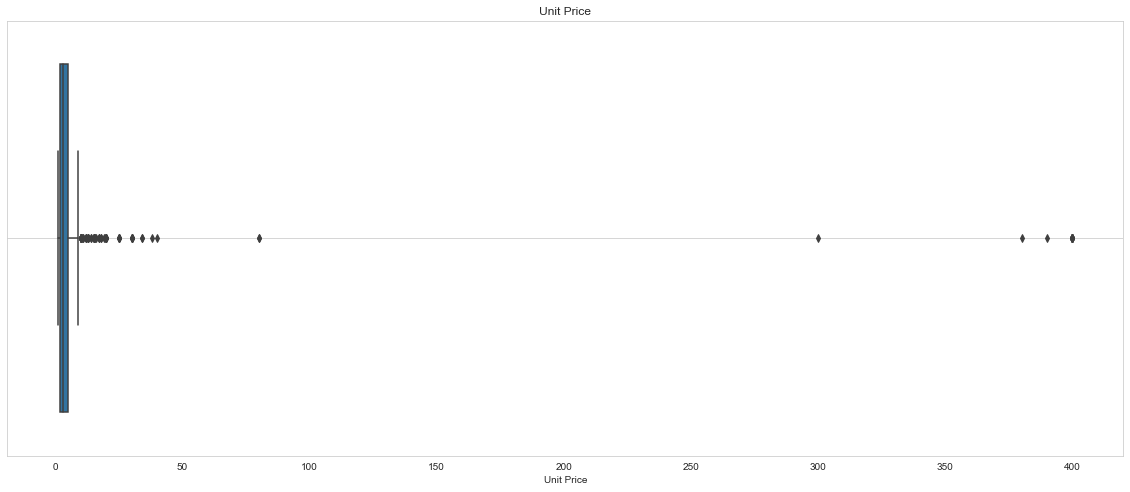

In [33]:
usful_df = df[df['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [34]:
limit_data = df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [35]:
limit_data.shape

(9338, 13)

### b. Reviews column

i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

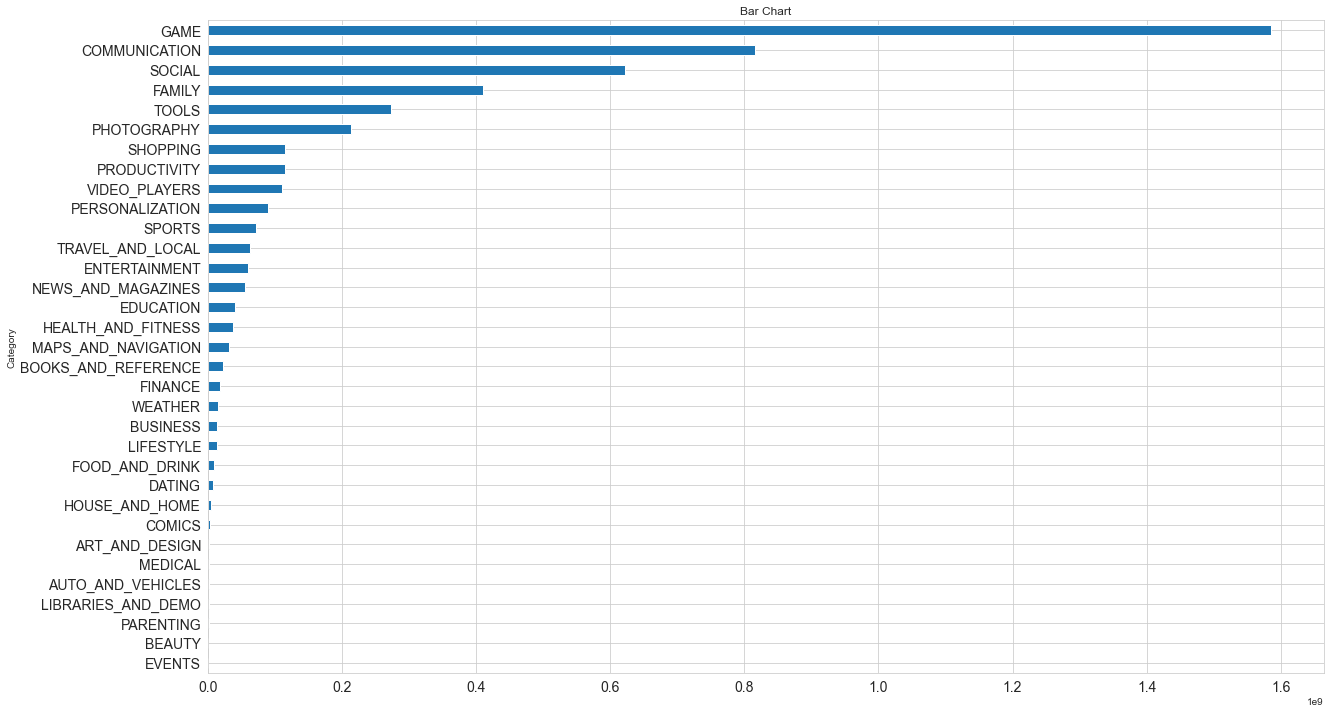

In [36]:
#group by needful columns
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(20,12))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.title("Bar Chart")
plt.show()

Top 5 Reviewed Apps by Category

Category

    GAME                   1585419555
    COMMUNICATION           815461799
    SOCIAL                  621241071
    FAMILY                  410223081
    TOOLS                   273184168

ii. Limit data to apps with < 1 Million reviews

In [37]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [38]:
limit_data_by_review.shape

(8655, 13)

### c. Installs

i. What is the 95th percentile of the installs?

In [39]:
data2['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [40]:
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


95th percentile of the installs is 100000000.0

ii. Drop records having a value more than the 95th percentile

In [41]:
# Double checking
x = df.Installs.quantile() > val
print (x)

False


There is no value more than the 95th percentile.

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?

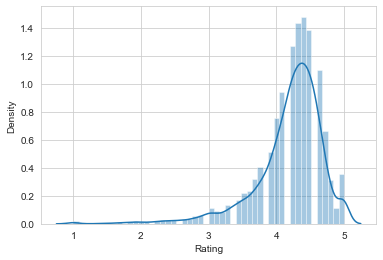

In [42]:
sns.distplot(df['Rating'])
plt.show()

a. How do you explain this?

    A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.The mean is also on the left of the peak.
     Here you can see three measures position on the plot. So, you will find that:
    mean less than the mode
    median less than the mode
    mean less than median

    Here the distribution tells that most of the rating is in between 4 to 5.

b. What is the implication of this on your analysis?

    When we consider our real life the distributions are skewed. If there are too much skewness in the data, then many statistical model don’t work.
    So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models.
    So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

    Conclusion:
        If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

### 6. What are the top Content Rating values?

In [43]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

top Content Rating values are :-

        Content Rating
        
    Everyone           7414
    Teen               1083
    Mature 17+          461
    Everyone 10+        397
    Adults only 18+       3
    Unrated               1

    a. Are there any values with very few records?
    Yes. 2 of the values have.
    'Unrated' Content Rating has value 1 and 'Adults only 18+' has value 3.

b. If yes, drop those as they won’t help in the analysis

In [44]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [45]:
# Pie Diagram
import pieplot.graph_objects as go

fig = go.Figure(go.Pie(
    title = "Top Content Rating",
    values = [7414,1083,461,397],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+'],
))
fig.show()

ModuleNotFoundError: No module named 'pieplot'

### 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

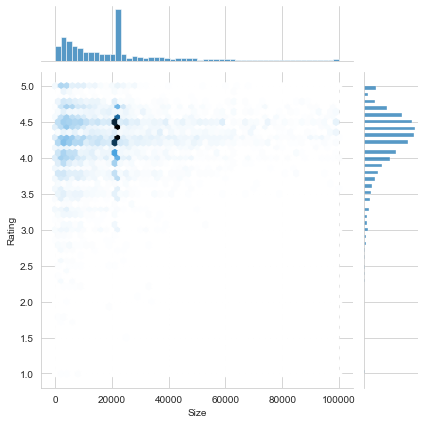

In [46]:
sns.jointplot(x=df['Size'],y=df['Rating'],kind='hex',data=df)
plt.show()

    b. Do you see any patterns?
    c. How do you explain the pattern?

### 8. Effect of price on rating

a. Make a jointplot (with regression line)

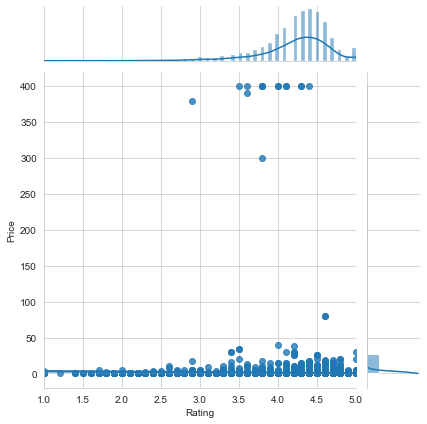

In [47]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df, kind="reg")
plt.show()

b. What pattern do you see?

Increasing the price makes Rating Increases

c. How do you explain the pattern?

As we can see, the higher the price higher the rating

d. Replot the data, this time with only records with price > 0

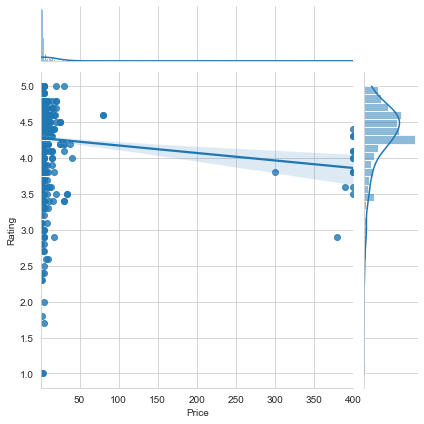

In [48]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

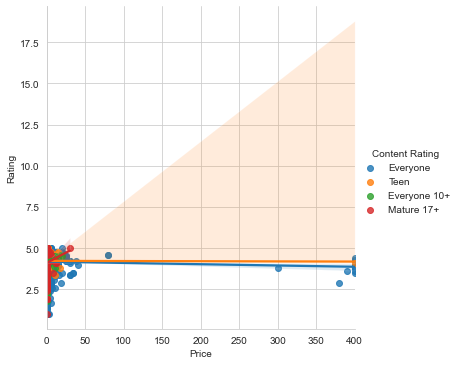

In [49]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df)
plt.show()

    e. Does the pattern change?
    f. What is your overall inference on the effect of price on the rating

    Content Rating "Mature" and "Teen" are more positively co-related in Content rating than 10+ and everyone

###    9. Look at all the numeric interactions together –

 a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

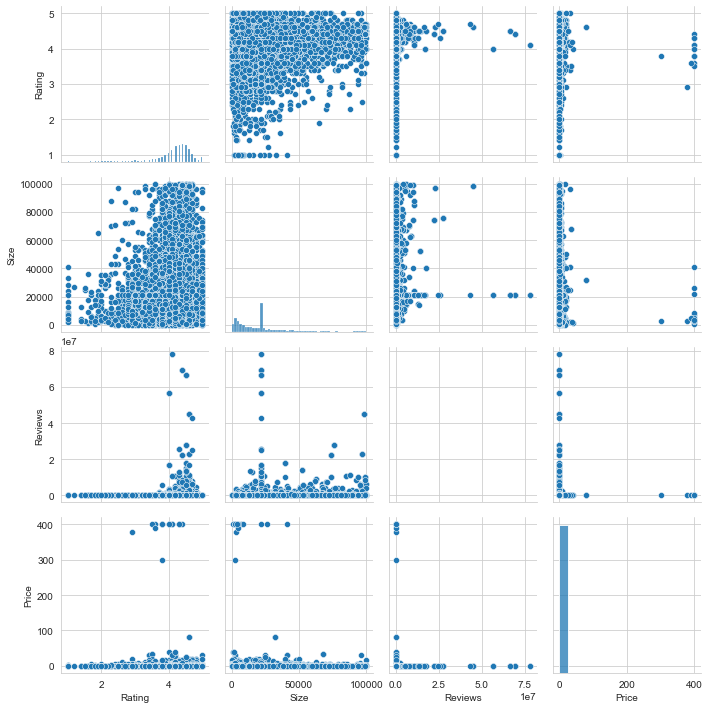

In [51]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

### 10. Rating vs. Content Rating

a. Make a bar plot displaying the rating for each content rating

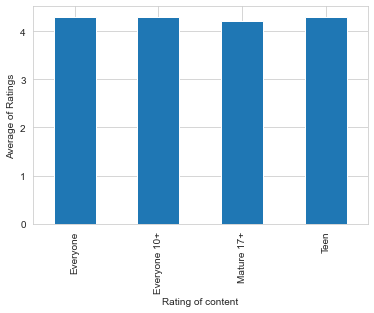

In [52]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

    b. Which metric would you use? Mean? Median? Some other quantile?
    
    Mean

c. Choose the right metric and plot

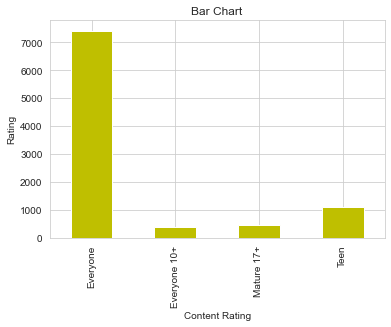

In [53]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="y")
plt.ylabel('Rating')
plt.title("Bar Chart")
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

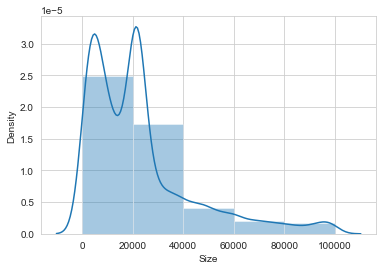

In [54]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

In [55]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [56]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [57]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this

i. Annotated

In [58]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


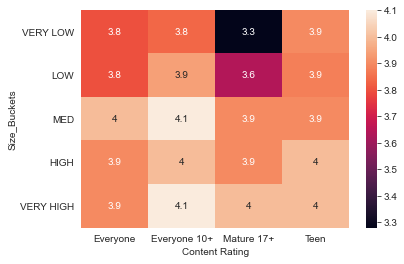

In [59]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

ii. Greens color map

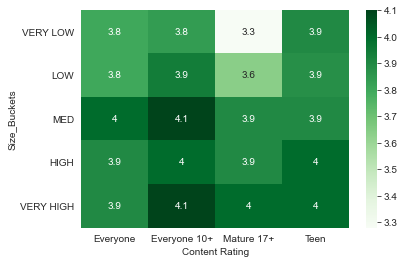

In [60]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

My inference is that most of the havier apps seems to be more preferred in the "Content Ratings". But, at the same time there is no big variations in it.
The only exceptional case is Mature 17+ where low size apps arent preferred to a greater variation.